First, recall how the feed-forward path of a feed forward neural network is computed.

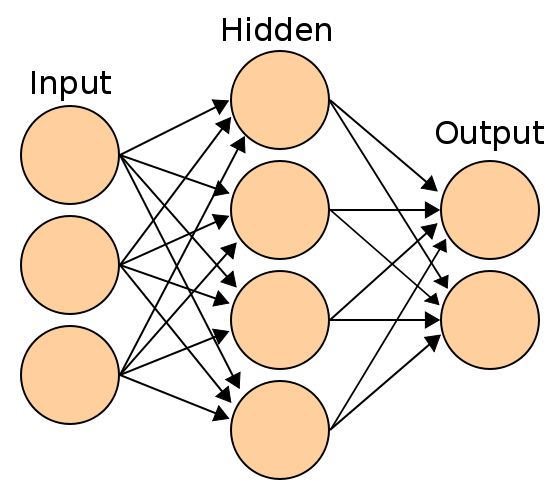

You have an input vector X and a label vector y.  Especially in the case of classification, y is a vector.  For regression, y is often a scalar, but the math works the same either way.  So the task of the neural network is to compute $\hat y$ from the input vector X using the weigh matrixes W1 and W2 such that $\hat y$ and y are as close as possible for all vectors in the training set X.

$W_1$ is the weight used between the input and hidden layers and $W_2$ is the weight used between the hidden and output layers, and we want to have: $$\hat y \approx y$$

So moving from left to right, we first have: $$ z_2=XW_1$$  and we apply the activation function: $$f(x) = sigmoid(x)$$ to obtain: $$a_2=f(z_2)$$  Next we compute the output layer: $$z_3=a_2W_2$$  

This represents stacking the computations on top of each other.  

Finally we compute: $$ \hat y=a_3=f(z_3) $$

These computations really are just taking a dot product and then taking the sigmoid function, and doing that twice.  Before when we did this in an earlier notebook the weight matrixes $W_1$ and $W_2$ were randomly initialized and as a result, $\hat y$ and $y$ where very much different.  So the next step is to train the neural network to do a better job, which means updating the weights to obtain the best possible $\hat y$ on a given X with respect to y for all data points in X.  But how do we find the optimal values of the weights?

The cost function can be shown the the cost plotted vertically (y-axis) and the two weights plotted on the x and y axes.  The lower the cost (in the z direction) the better the neural network performance, which means that the $\bar y$ is closest to the actual $y$ value.  The cost function is $J(W,T)$, where $W$ is the weight matrix composed of $W_1$ and $W_2$.  We want to optimize over W.  T stands for the training dataset, which remains the same when we are using the dataset.   This amounts to J being dependent only on W for a given dataset.  In the example we are exploring, the weight matrix is two-dimensional, but in reality the optimization space would be high-dimensional and impossible to plot.  How can we find the optimal value for J by finding the best values within the matrix W.

One way to do this is gridsearch.  To do this, you just choose a discrete set of values across W1 and W2 and just apply the cost function to these combinations and the one combination with the lowest value we say is our optimal value set for W.  In this method, each of the scalar weights can be assigned a value between -1 and 1:

$$
v=[-1,1] \\ \\
grid=[-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
$$

Now the problem with this approach is that if we have 100 dimensions, we have to test more points than there are atoms in the universe, so this is not going to work.  If we do not use a grid but instead just randomly choose points to search, this is called Monte Carlo, and it outperforms gridsearch, but it is still too many values to test and is therefore not feasible.  So that leaves us with the idea of choosing one value, testing it, and then deciding which direction to go to get to a lower point.  Then we could just climb down until we reach an optimal value.  This method is called Gradient Descent, and with all its variants, it is the defacto standard of neural network training.

So how does gradient descent work?  The cost function is:

$$
J = \sum {\dfrac{1}{2}(y-\hat y)^2}
$$

This is called the quadratic cost, which is the sum of the squares of the differences between the prediction of the neural network and the actual real value.  The difference is called the error.  Therefore, this is called the sum of squared errors.  There exist other cost functions as well:  cross entropy, exponential cost, hellinger distance, and many more.  Choosing an appropriate cost function depends on your data and your neural network topology.  Choosing the appropriate cost function is all part of the hyperparameter space. [This is wrong, but I couldn't really understand the lecture here. -FH]  An ideal selection of a cost function is sometimes considered black magic.  In other words, it can be a trial and error process.  Now, recall how $\hat y$ is calcualted:

$$ \hat y = a_3 = f(z_3)
$$

And how $z_3$ is calculated:
$$
z_3=a_2W_2
$$

$z_3$ is the activation of the previous layer multiplied by the previous weights.  Therefore:

$$ \hat y = a_3 = f(a_2W_2)
$$

In turn, you can replace $a_2$ as follows:

$$
a_2=f(z_2)=f(XW_1)
$$

and:

$$ \hat y = a_3 = f(f(XW_1)W_2)
$$

Finally, put this form into the cost function $J$:

$$
J = \sum {\dfrac{1}{2}(y-f(f(XW_1)W_2))^2}
$$

And we obtain the cost function J based on all individual compuations of the forward pass of the neural network.  Now based on this equation we can look at the back-propogation method.  This calculates the neural network calculations backwards and it does so by back propogating the error $Y - \hat Y$:

$$ \sigma_3 = -(y-\hat y)f'(z_3)
$$

From an intuitive approach, this means that on the reverse computation of the neural network, big weight values end up back propagating big amounts of the error to the upstream layers and a small weight values only let small amounts of the error to be back-propagated.

The upshot of all this is that we can use the derivative to know which direction we need to move in the gradient in order to go "downhill" (which is really just a visual that works on a 3D manifold surface).  We compute the partial derivative of J with respect to $W_2$ first.   Skipping the calculus for expediency here accept that the following is true based on back propagation.  Note that f prime above is the first derivative of the activation function f.

$$
\dfrac{\partial J}{\partial W_2}=a_2^T \sigma_3
$$

We continue as follows:

$$ \sigma_2 = \sigma_3 W_2^T f'(z_2)
$$

and:

$$ \dfrac{\partial J}{\partial W_1}=X^T \sigma_2
$$

This is the basis for how gradient descent works and tries to find the global optimum (global minimum of the cost function).  However, the gradient descent method cannot guarantee that it results in the global minimum, since it is a stepwise method that might end up in a local minima not a global one. If the cost function is completely convex, then it would result in a global mimima.  But this is not normally the case in machine learning.  Therefore a lot of hyperparameter tuning may be necessary.

test [end]